In [16]:
import pandas as pd 
from sklearn import datasets
import matplotlib.pyplot as plt
from ConvexHull_v2 import ConvexHull_v2

def printPilihan():
    print("    1. Sepal Width (y) vs Sepal Length (x)    :: IRIS-Datasets")
    print("    2. Petal Width (y) vs Petal Length (x)    :: IRIS-Datasets")
    print("    3. Color Intensity (y) vs Alcohol % (x)   :: WINE-Datasets")
    print("    4. Flavanoids (y) vs Total Phenols (x)    :: WINE-Datasets")
    print("    5. Mean Texture (y) vs Mean Radius (x)    :: Breas_Cancer-Datasets")
    print("    6. Worst Texture (y) vs Worst Radius (x)  :: Breas_Cancer-Datasets")
    pil = int(input("Masukkan pilihan : "))
    return pil

''' ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ '''
### USER INTERFACE
print("Selamat datang di Uji Coba Convex Hull v.2.0.1")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Terdapat beberapa pilihan visualisasi :")
pil = printPilihan()

while not(1<=pil<=6):
    print("Masukan anda tidak sesuai..!! Harap masukkan pilihan kembali..!!")
    printPilihan()

print("Pilihan anda adalah :",pil)

if (pil==1 or pil==2):
    data = datasets.load_iris()
    if pil==1:
        title = 'Sepal Width vs Sepal Length'
        col1 = 0
        col2 = 1
    elif pil==2:
        title = 'Petal Width vs Petal Length' 
        col1 = 2
        col2 = 3
elif (pil==3 or pil==4):
    data = datasets.load_wine()
    if pil==3:
        title = 'Color Intensity vs alcohol'
        col1 = 0
        col2 = 9
    elif pil==4:
        title = 'Flavanoids vs Total Phenols' 
        col1 = 5
        col2 = 6
elif (pil==5 or pil==6):
    data = datasets.load_breast_cancer()
    if pil==5:
        title = 'Mean Texture vs Mean Radius'
        col1 = 0
        col2 = 1
    elif pil==6:
        title = 'Worst Texture vs Worst Radius'
        col1 = 20
        col2 = 21

Selamat datang di Uji Coba Convex Hull v.2.0.1
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Terdapat beberapa pilihan visualisasi :
    1. Sepal Width (y) vs Sepal Length (x)    :: IRIS-Datasets
    2. Petal Width (y) vs Petal Length (x)    :: IRIS-Datasets
    3. Color Intensity (y) vs Alcohol % (x)   :: WINE-Datasets
    4. Flavanoids (y) vs Total Phenols (x)    :: WINE-Datasets
    5. Mean Texture (y) vs Mean Radius (x)    :: Breas_Cancer-Datasets
    6. Worst Texture (y) vs Worst Radius (x)  :: Breas_Cancer-Datasets
Pilihan anda adalah : 6


In [17]:
#create a DataFrame 
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print()
print("Berikut Contoh Data yang Diolah :")
df.head()


Berikut Contoh Data yang Diolah :


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Berikut Visualisasi Data yang Diolah :


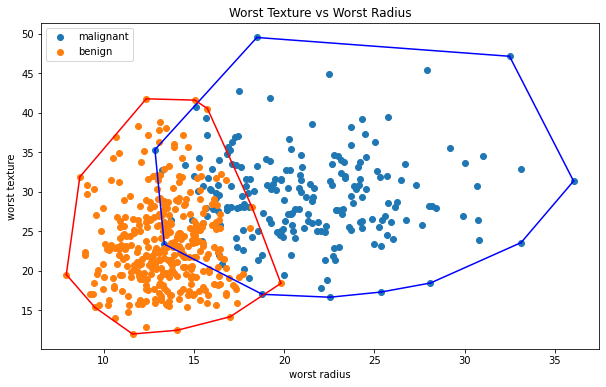

In [18]:
# Visualizing Datasets
colors = ['b','r','g']
fig = plt.figure(figsize = (10, 6))
plt.title(title)
plt.xlabel(data.feature_names[col1])
plt.ylabel(data.feature_names[col2])

print("Berikut Visualisasi Data yang Diolah :")
for i in range(len(data.target_names)):
    each = df[df['Target'] == i]                # untuk mengambil data dengan target yang seragam
    bucket = each.iloc[:,[col1,col2]].values    # untuk mendapatkan aray berupa posisi x dan y, berukuran n x 2, n adalah banyak data
    simplices = ConvexHull_v2(bucket)           # bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in simplices:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

# Tampilkan dan simpan hasil visualisasi
rect = fig.patch
rect.set_facecolor("white")
plt.savefig("../output/" + str(pil) + ". " + title + ".png")
plt.show()

